In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/SVMtrain.csv


In [2]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/kaggle/input/titanic-dataset/SVMtrain.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [5]:
df.shape

(889, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['Sex']=le.fit_transform(df['Sex'])

In [12]:
x = df.drop(['Embarked','PassengerId'],axis=1)
y = df.Embarked

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [14]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's multi_logloss: 0.339958	valid_0's multi_logloss: 0.471407
[40]	training's multi_logloss: 0.209648	valid_0's multi_logloss: 0.438442
[60]	training's multi_logloss: 0.142388	valid_0's multi_logloss: 0.450438
[80]	training's multi_logloss: 0.104655	valid_0's multi_logloss: 0.470609
[100]	training's multi_logloss: 0.0797318	valid_0's multi_logloss: 0.513113


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [15]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9866
Testing accuracy 0.8061


# XGBoost

In [16]:
# import xgboost as xgb

# model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
# model.fit(x_train, y_train)


# CatBoost

In [17]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
model.fit(x_train, y_train)


0:	learn: 1.0353398	total: 56.8ms	remaining: 5.62s
1:	learn: 0.9750033	total: 58.5ms	remaining: 2.87s
2:	learn: 0.9304607	total: 59.9ms	remaining: 1.94s
3:	learn: 0.8900969	total: 61.2ms	remaining: 1.47s
4:	learn: 0.8572221	total: 62.1ms	remaining: 1.18s
5:	learn: 0.8254990	total: 63.3ms	remaining: 992ms
6:	learn: 0.7998834	total: 64.6ms	remaining: 859ms
7:	learn: 0.7736344	total: 65.9ms	remaining: 758ms
8:	learn: 0.7482230	total: 67.5ms	remaining: 683ms
9:	learn: 0.7220972	total: 69ms	remaining: 621ms
10:	learn: 0.7048241	total: 70.4ms	remaining: 569ms
11:	learn: 0.6916101	total: 71.7ms	remaining: 526ms
12:	learn: 0.6763735	total: 73.2ms	remaining: 490ms
13:	learn: 0.6624079	total: 74.5ms	remaining: 457ms
14:	learn: 0.6451455	total: 75.9ms	remaining: 430ms
15:	learn: 0.6357520	total: 77.3ms	remaining: 406ms
16:	learn: 0.6273587	total: 78.7ms	remaining: 384ms
17:	learn: 0.6202157	total: 80.1ms	remaining: 365ms
18:	learn: 0.6139435	total: 81.4ms	remaining: 347ms
19:	learn: 0.6065470	tot

In [18]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7993197278911565


In [19]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.8790
Testing accuracy 0.7993


# Stochastic Gradient Descent (SGD)

In [20]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(x_train, y_train)


SGDClassifier()

In [21]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7210884353741497


In [22]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7261
Testing accuracy 0.7211


# Bagging (Bootstrap Aggregating)

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier()
model = BaggingClassifier(base_model)
model.fit(x_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier())

In [24]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8163265306122449


In [25]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9882
Testing accuracy 0.8163


# AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)


AdaBoostClassifier()

In [27]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.782312925170068


In [28]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7882
Testing accuracy 0.7823


# Gaussian Processes

In [29]:
from sklearn.gaussian_process import GaussianProcessClassifier

model = GaussianProcessClassifier()
model.fit(x_train, y_train)


GaussianProcessClassifier()

In [30]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857


In [31]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9092
Testing accuracy 0.7857


# Long Short-Term Memory (LSTM)

In [32]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [33]:
X_train = x_train.values.reshape(x_train.shape[0], -1)
X_test = x_test.values.reshape(x_test.shape[0], -1)

In [34]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
19/19 [==============================] - 3s 6ms/step - loss: -0.4358 - accuracy: 0.1261
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: -4.2915 - accuracy: 0.1849
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: -10.0929 - accuracy: 0.1849
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: -15.7930 - accuracy: 0.1849
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: -20.2179 - accuracy: 0.1849
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: -23.4172 - accuracy: 0.1849
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: -26.0792 - accuracy: 0.1849
Epoch 8/10
19/19 [==============================] - 0s 5ms/step - loss: -28.5032 - accuracy: 0.1849
Epoch 9/10
19/19 [==============================] - 0s 5ms/step - loss: -30.7662 - accuracy: 0.1849
Epoch 10/10
19/19 [==============================] - 0s 5ms/step - loss: -32.9675 - accuracy: 0.1849


In [37]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

10/10 [==============================] - 0s 2ms/step
Accuracy: 0.19727891156462585


# Quadratic Discriminant Analysis (QDA)

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)


QuadraticDiscriminantAnalysis()

In [39]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5102040816326531


In [40]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.5630
Testing accuracy 0.5102


# Linear Discriminant Analysis (LDA)

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)


LinearDiscriminantAnalysis()

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)


LinearDiscriminantAnalysis()

In [43]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7448979591836735


In [44]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7462
Testing accuracy 0.7449


# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [46]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.48299319727891155


In [47]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.5008
Testing accuracy 0.4830


# K-Nearest Neighbors (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)


KNeighborsClassifier()

In [49]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7993197278911565


In [50]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7933
Testing accuracy 0.7993


# Support Vector Machines (SVM)

In [51]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)


SVC()

In [52]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7244897959183674


In [53]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7294
Testing accuracy 0.7245


# Gradient Boosting Machines (GBM)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [55]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8435374149659864


In [56]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9613
Testing accuracy 0.8435


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7959183673469388


In [59]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9950
Testing accuracy 0.7959


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.826530612244898


In [62]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9950
Testing accuracy 0.8265


# Logistic Regression

<p style="color:black;font-size:24px;">Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not. It is a kind of statistical algorithm, which analyze the relationship between a set of independent variables and the dependent binary variables. It is a powerful tool for decision-making. For example email spam or not. <p/>

<p style="color:blue;font-size:22px;">The logistic regression model transforms the linear regression function continuous value output into categorical value output using a sigmoid function, which maps any real-valued set of independent variables input into a value between 0 and 1. This function is known as the logistic function.<p/>

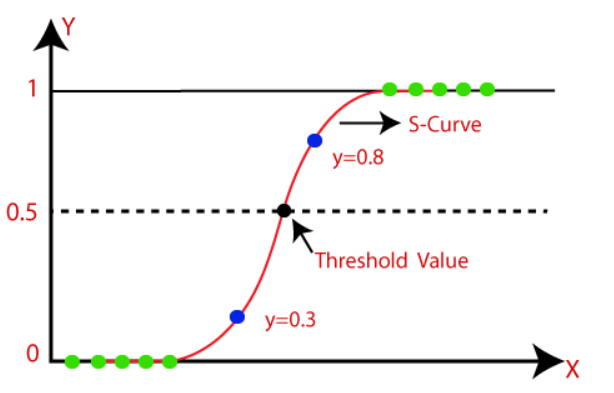

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7346938775510204


In [65]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.7395
Testing accuracy 0.7347
